# Assignment 02

Dear students,

The second worksheet is now available [here](https://mycampus.imp.fu-berlin.de/portal/directtool/c206efd7-b97b-481e-86e4-7210cd66f639/). You will have time until next Friday, 16:00 MEST.

Some torch classes that might come in handy:

* [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

* [torch.nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

* [torch.nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html?highlight=softmax#torch.nn.Softmax) (for "one-hot encoding")

Best,
Your tutors

You are given MNIST-type training data of images with handwritten digits. The data consists of training images with associated labels in $\{0,1,\dots,9\}$ and an unlabeled test set.

Your task is to train a neural network model of your choice to predict the digit from the image.

As a submission, please upload the prediction of digits for the test set exactly as shown below.

For this prediction, we will use the following grading scheme:

| accuracy | points |
|----------|--------|
| ≥50%     | 5      |
| ≥75%     | 7      |
| ≥90%     | 10     |
 

If you present your work in the tutorial, be prepared to show your code, explain how you prepared the data, how you chose the network architecture and other hyperparameters, how you validated the model, and show the convergence of the training error.


To load and visualize the data, please refer to the following code:

## Load data

(20000, 1, 28, 28) float32
(20000,) int64
(2000, 1, 28, 28) float32


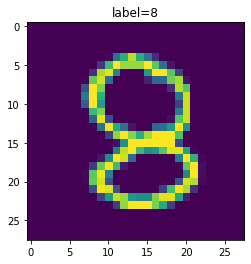

In [119]:
import io

import requests
import numpy as np
import matplotlib.pyplot as plt


response = requests.get('https://github.com/jneuendorf/deeplearning-lecture-21/blob/main/02/prediction-challenge-01-data.npz?raw=true')
with np.load(io.BytesIO(response.content)) as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)

N, CHANNELS, WIDTH, HEIGHT = data_x.shape


plt.imshow(data_x[0, 0])
plt.title(f'label={data_y[0]}')
plt.show()

---

## Define model

In [120]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))


class Mnist(nn.Module):
    def __init__(self, width=WIDTH, height=HEIGHT):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(width * height, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            # nn.ReLU(),
            # nn.Softmax(dim=1),
        )

    def forward(self, x):
        return self.stack(x)


Using cuda device


## Train model

In [152]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F


model = Mnist().to(device)
print()
print(model)


# Prepare data
X_train, X_test, y_train, y_test = train_test_split(
    torch.tensor(data_x.reshape((data_x.shape[0], -1)), device=device), 
    torch.tensor(data_y, device=device), 
    test_size=0.2,
)


LR = 1e-3
EPOCHS = 1500

loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model.parameters(), lr=LR)


# TODO: Try minibatch?

# batch
for epoch in range(EPOCHS):
    # Compute prediction and loss
    pred = model(X_train)
    loss = loss_function(pred, y_train)

    # Backpropagation
    optim.zero_grad()
    loss.backward()
    optim.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch + 1}/{EPOCHS}], Loss: {loss.item()}')



Mnist(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch [1/1500], Loss: 13.239827156066895
Epoch [101/1500], Loss: 0.03404292091727257
Epoch [201/1500], Loss: 0.0031812558881938457
Epoch [301/1500], Loss: 0.0009742943802848458
Epoch [401/1500], Loss: 0.000481240771478042
Epoch [501/1500], Loss: 0.00028618911164812744
Epoch [601/1500], Loss: 0.00018847368482965976
Epoch [701/1500], Loss: 0.00013292171934153885
Epoch [801/1500], Loss: 9.837425750447437e-05
Epoch [901/1500], Loss: 7.557174103567377e-05
Epoch [1001/1500], Loss: 5.968150435364805e-05
Epoch [1101/1500], Loss: 4.80682028864976e-05
Epoch [1201/1500], Loss: 3.9443148125428706e-05
Epoch [1301/1500], Loss: 3.29113427142147e-05
Epoch [1401/1500], Loss: 2.7806499929283746e-05


## Test model

In [153]:
with torch.no_grad():
    print(X_test.shape)
    outs = model(X_test)
    _, predicted = torch.max(outs.data, 1)
    total = X_test.size(0)
    print(predicted.shape, y_test.shape)
    print(predicted, y_test)
    correct = (predicted == y_test).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

torch.Size([4000, 784])
torch.Size([4000]) torch.Size([4000])
tensor([0, 8, 1,  ..., 4, 4, 1], device='cuda:0') tensor([0, 2, 1,  ..., 4, 4, 1], device='cuda:0')
Accuracy: 95.65%


## Export

Use your trained model to predict the digits for the test data. Store the prediction as shown in the code snippet below and upload your prediction file.

Please note that you need to use exactly the shown file format, file name, and array shape as shown in the code snippet. Otherwise, we might not be able to correctly process your submission.

test data shape (2000, 1, 28, 28)
torch.Size([2000, 784])


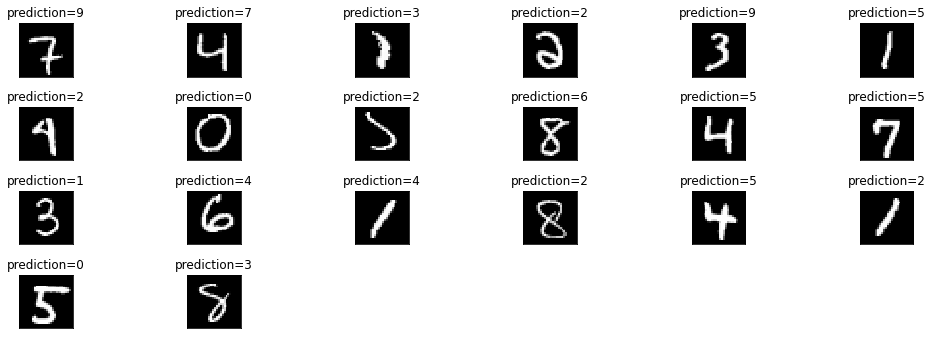

In [156]:
import math

import numpy as np
import torch


print('test data shape', test_x.shape)
test_x_tensor = torch.tensor(test_x.reshape((test_x.shape[0], -1)), device=device)


# def fullprint(*args, **kwargs):
#     from pprint import pprint
#     import numpy
#     opt = numpy.get_printoptions()
#     numpy.set_printoptions(threshold=numpy.inf)
#     pprint(*args, **kwargs)
#     numpy.set_printoptions(**opt)


# Final test for `test_x` from the 1st cell
with torch.no_grad():
    print(test_x_tensor.shape)
    # outs = model(test_x_tensor)
    # _, predicted = torch.max(outs.data, 1)

    prediction_raw = model(test_x_tensor)
    # Transform 10-element output tensors to the digits that they represent
    prediction = prediction_raw.argmax(dim=1)
    # print(prediction)

    SAMPLE_SIZE = 20
    N_COLS = 6
    indices = np.random.choice(test_x.shape[0], size=SAMPLE_SIZE, replace=False)
    # print('sample indices', indices)
    test_x_sample = test_x[indices]
    # fullprint(test_x_sample.astype(int), width=300, compact=False)
    prediction_sample = prediction[indices]
    # print('test sample', test_x_sample.shape, test_x_sample)
    fig = plt.figure(figsize=(14, 5))
    for i, x in enumerate(test_x_sample):
        plt.subplot(math.ceil(SAMPLE_SIZE / N_COLS), N_COLS, i + 1)
        plt.tight_layout()
        plt.imshow(x[0], cmap='gray', interpolation='none')
        plt.title(f'prediction={prediction[i]}')
        plt.xticks([])
        plt.yticks([])
        # print(prediction[i])


# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1 and prediction.shape[0] == 2000, 'Prediction tensor must have shape ([2000])'

# AND SAVE EXACTLY AS SHOWN BELOW
# np.save('prediction.npy', prediction)